# Exercício 19

### Análise de Pinguins e História dos Oceanos Dataset do Kaggle: Palmer's Penguins

https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended
O dataset de Palmer's Penguins contém informações sobre três espécies de pinguins, suas características físicas e o ambiente onde vivem. 

Imagine que você está trabalhando para um documentário sobre as mudanças climáticas e deseja usar os dados dos pinguins para contar uma história visual sobre como essas mudanças estão afetando essas aves marinhas.

---

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
df_penguins = pd.read_csv('documents/palmerpenguins_extended.csv')

***Existem valores ausentes ou inconsistentes no dataset? Se sim, como você trataria esses dados para garantir a qualidade da análise?***

In [58]:
df_valores_ausentes = df_penguins.isnull().sum()
df_valores_ausentes

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [59]:
df_valores_inconsistentes = df_penguins.describe(include='all')
df_valores_inconsistentes

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
count,3430,3430,3430.000000,3430.000000,3430.000000,3430.000000,3430,3430,3430,3430,3430.000000
unique,3,3,NaN,NaN,NaN,NaN,2,4,3,3,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,female,krill,juvenile,healthy,NaN
freq,1560,1785,NaN,NaN,NaN,NaN,1726,1419,1541,1550,NaN
mean,NaN,NaN,38.529825,18.447143,207.028863,4834.710496,NaN,NaN,NaN,NaN,2023.348397
std,NaN,NaN,13.175171,2.774428,28.944765,1311.091310,NaN,NaN,NaN,NaN,1.313797
min,NaN,NaN,13.600000,9.100000,140.000000,2477.000000,NaN,NaN,NaN,NaN,2021.000000
25%,NaN,NaN,28.900000,16.600000,185.000000,3843.500000,NaN,NaN,NaN,NaN,2022.000000
50%,NaN,NaN,34.500000,18.400000,203.000000,4633.500000,NaN,NaN,NaN,NaN,2024.000000
75%,NaN,NaN,46.600000,20.300000,226.000000,5622.000000,NaN,NaN,NaN,NaN,2024.000000


O método isnull().sum() nos mostra a quantidade de valores ausentes em cada coluna. Caso haja valores ausentes, posso tratá-los removendo-os ou preenchendo-os com uma estratégia adequada (como a média, mediana ou interpolação).

***Exemplo:***

In [60]:
# Excluir linhas com valores ausentes
df_penguins_cleaned = df_penguins.dropna()
df_penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


***Realize uma análise exploratória dos dados para entender as características físicas (como peso, comprimento do bico e comprimento da asa) das três espécies de pinguins. Utilize agregações e agrupamentos para comparar essas características entre as espécies.***

In [61]:
mean_stats = df_penguins.groupby('species')[['body_mass_g', 'bill_length_mm', 'flipper_length_mm']].mean()
mean_stats

,body_mass_g,bill_length_mm,flipper_length_mm
species,,,
Adelie,4445.475641,35.431603,200.759615
Chinstrap,4602.531300,35.014607,201.675762
Gentoo,5437.640738,44.161909,217.546111


In [62]:
median_stats2 = df_penguins.groupby('species')[['body_mass_g', 'bill_length_mm', 'flipper_length_mm']].median()
median_stats2

,body_mass_g,bill_length_mm,flipper_length_mm
species,,,
Adelie,4343.5,32.3,196.0
Chinstrap,4439.0,31.8,199.0
Gentoo,5234.0,40.7,214.0


In [63]:
std_stats3 = df_penguins.groupby('species')[['body_mass_g', 'bill_length_mm', 'flipper_length_mm']].std()
std_stats3

,body_mass_g,bill_length_mm,flipper_length_mm
species,,,
Adelie,1063.539766,11.563505,27.236390
Chinstrap,1109.656848,10.846660,24.693963
Gentoo,1456.089810,14.203180,29.980265


In [64]:
min_max_stats4 = df_penguins.groupby('species')[['body_mass_g', 'bill_length_mm', 'flipper_length_mm']].agg(['min', 'max'])
min_max_stats4

body_mass_g          bill_length_mm       flipper_length_mm       
                  min      max            min   max               min    max
species                                                                     
Adelie         2477.0   8128.0           13.6  78.4             140.0  298.0
Chinstrap      2704.0   8845.0           17.0  75.5             143.0  299.0
Gentoo         2642.0  10549.0           16.8  88.2             149.0  308.0

***Crie gráficos para visualizar as diferenças entre as espécies de pinguins com base nas características físicas. Use gráficos de dispersão, boxplot e histogramas para mostrar as distribuições e comparações entre as variáveis.***

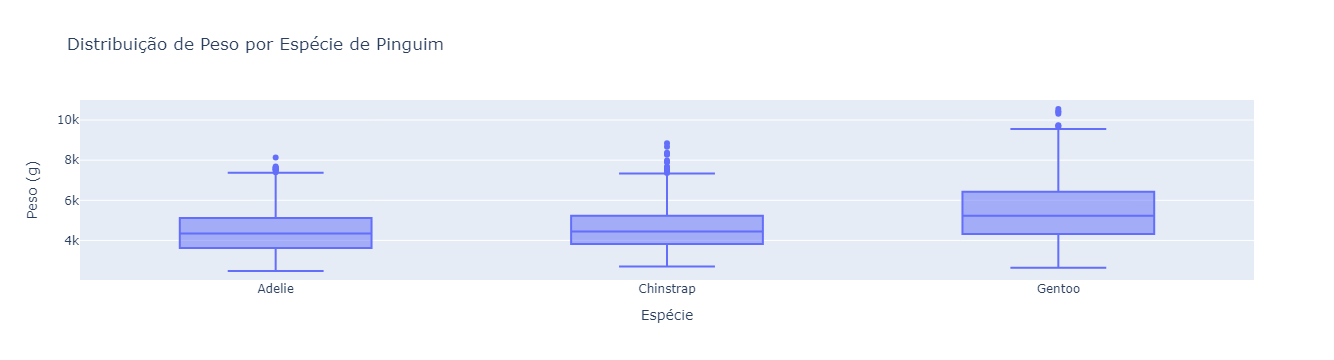

In [65]:
fig = px.box(df_penguins, x='species', y='body_mass_g', title='Distribuição de Peso por Espécie de Pinguim', labels={'species': 'Espécie', 'body_mass_g': 'Peso (g)'})
fig.show()

<Figure size 800x600 with 0 Axes>

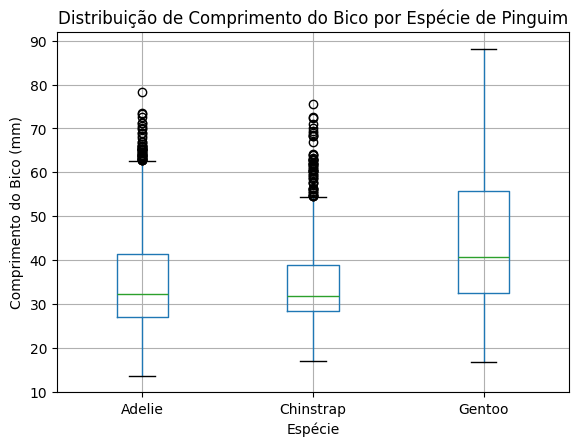

In [66]:
plt.figure(figsize=(8, 6))
df_penguins.boxplot(column='bill_length_mm', by='species')
plt.title('Distribuição de Comprimento do Bico por Espécie de Pinguim')
plt.suptitle('')
plt.xlabel('Espécie')
plt.ylabel('Comprimento do Bico (mm)')
plt.show()

<Figure size 800x600 with 0 Axes>

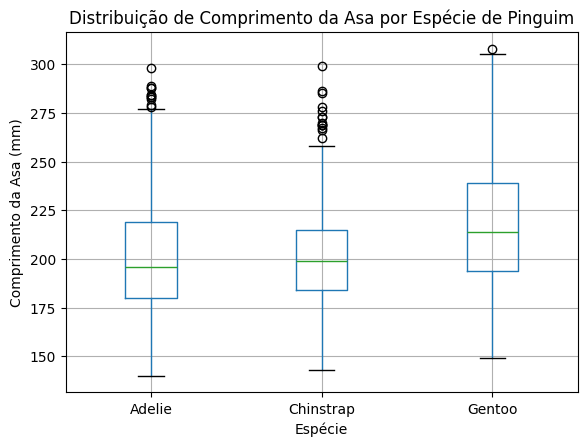

In [67]:
plt.figure(figsize=(8, 6))
df_penguins.boxplot(column='flipper_length_mm', by='species')
plt.title('Distribuição de Comprimento da Asa por Espécie de Pinguim')
plt.suptitle('')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Asa (mm)')
plt.show()

***Com base nas suas visualizações, escreva uma breve narrativa que conecte os dados com a situação atual dos pinguins. O que os dados sugerem sobre o habitat e as condições físicas desses animais? Como isso pode ser interpretado em relação às mudanças ambientais?***

Os boxplots mostram que as três espécies de pinguins têm diferenças claras em suas características físicas. A espécie Gentoo é geralmente mais pesada, enquanto a Adélie tende a ser mais leve. Além disso, as variações no comprimento do bico e da asa indicam adaptações específicas a seus habitats.\
\
Essas características físicas podem estar ligadas às condições ambientais que os pinguins enfrentam. Por exemplo, o comprimento do bico pode influenciar a capacidade de se alimentar, enquanto o peso e o comprimento das asas podem afetar a locomoção. As mudanças climáticas, como o derretimento do gelo e a escassez de alimentos, podem impactar essas adaptações, colocando pressão sobre algumas espécies mais do que sobre outras. Isso destaca a importância de monitorar como essas aves se ajustam às novas condições ambientais.